# EDA

## Imports

In [ ]:
!pip install meteostat

In [ ]:
import holidays # For working with holiday data
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb

from datetime import datetime
from meteostat import Stations, Daily # For working with weather data
from xgboost import plot_importance


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Create functions

In [ ]:
## Features Functions

def create_datetime_features(df):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    df['date'] = pd.to_datetime(df.index.date)
    return df

def get_holiday_features(df, country_code='US'):
    """
    Creates holiday features from datetime index
    """
    year_range = list(range(min(df.index.year), max(df.index.year) + 1))
    country_holidays = holidays.country_holidays(
        country_code,
        years=year_range,
        observed=False
    )
    holiday_df = pd.DataFrame(country_holidays.items())
    holiday_df.columns = ['date', 'holiday']
    holiday_df['date'] = pd.to_datetime(holiday_df['date'])
    return holiday_df

def get_weather_features(df, lat, lon):
    """
    Creates weather features based on latitude and longitude
    """
    room_temperature = 20  # Weather data is in Celsius
    start = min(df.index)
    end = max(df.index)

    stations = Stations()
    stations = stations.nearby(lat, lon)
    station = stations.fetch(1)

    # Get daily data
    weather_data = Daily(station['wmo'][0], start, end)
    weather_data = weather_data.fetch()
    weather_data = weather_data.dropna(axis=1)
    weather_data = weather_data.reset_index()
    weather_data['tmin_abs_diff_from_room_temperature'] = abs(weather_data['tmin'] - room_temperature)
    weather_data['tmax_abs_diff_from_room_temperature'] = abs(weather_data['tmax'] - room_temperature)
    weather_data = weather_data.rename(columns ={'time': 'date'})

    return weather_data

In [ ]:
## Custom Evaluation Functions
def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculates the mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

df = pd.read_csv('https://raw.githubusercontent.com/Brunchcode/Forecasting-Energy-Consumption-Using-Machine-Learning/main/data/Timeseries/Timeseries_PJM_DOM_consumption_2006_to_2024.csv')
df = df.set_index('datetime')
df.index = pd.to_datetime(test.index)
df.head()

## Get Data and Use functions

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Brunchcode/Forecasting-Energy-Consumption-Using-Machine-Learning/main/data/Timeseries/Timeseries_PJM_DOM_consumption_2006_to_2024.csv', index_col=[0], parse_dates=[0])

In [ ]:
df.head()

,energy_consumption_mw,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,datetime
datetime,,,,,,,,,,,
2006-01-01 00:00:00,9250.0,2006-01-01,0,6,1,1,2006,1,1,52,2006-01-01 00:00:00
2006-01-01 01:00:00,8978.0,2006-01-01,1,6,1,1,2006,1,1,52,2006-01-01 01:00:00
2006-01-01 02:00:00,8773.0,2006-01-01,2,6,1,1,2006,1,1,52,2006-01-01 02:00:00
2006-01-01 03:00:00,8671.0,2006-01-01,3,6,1,1,2006,1,1,52,2006-01-01 03:00:00
2006-01-01 04:00:00,8664.0,2006-01-01,4,6,1,1,2006,1,1,52,2006-01-01 04:00:00


In [ ]:
data = create_datetime_features(df)
holiday_features = get_holiday_features(data)
weather_features = get_weather_features(data, 37.5407, -77.4360) # Richmond Capital of Virgina

In [ ]:
data['datetime'] = data.index

In [ ]:
data.head()

,energy_consumption_mw,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,datetime
datetime,,,,,,,,,,,
2006-01-01 00:00:00,9250.0,2006-01-01,0,6,1,1,2006,1,1,52,2006-01-01 00:00:00
2006-01-01 01:00:00,8978.0,2006-01-01,1,6,1,1,2006,1,1,52,2006-01-01 01:00:00
2006-01-01 02:00:00,8773.0,2006-01-01,2,6,1,1,2006,1,1,52,2006-01-01 02:00:00
2006-01-01 03:00:00,8671.0,2006-01-01,3,6,1,1,2006,1,1,52,2006-01-01 03:00:00
2006-01-01 04:00:00,8664.0,2006-01-01,4,6,1,1,2006,1,1,52,2006-01-01 04:00:00


In [ ]:
data_dt = data.copy()

In [ ]:
data = data.merge(holiday_features, how='left', on='date')
data['holiday'] = data['holiday'].fillna('')
data = pd.get_dummies(data)
data = data.merge(weather_features, how='left', on='date')

In [ ]:
data.head()

,energy_consumption_mw,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday,tavg,tmin,tmax,prcp,wspd,tmin_abs_diff_from_room_temperature,tmax_abs_diff_from_room_temperature
0,9250.0,2006-01-01,0,6,1,1,2006,1,1,52,...,False,False,False,5.8,-1.1,11.7,0.0,4.0,21.1,8.3
1,8978.0,2006-01-01,1,6,1,1,2006,1,1,52,...,False,False,False,5.8,-1.1,11.7,0.0,4.0,21.1,8.3
2,8773.0,2006-01-01,2,6,1,1,2006,1,1,52,...,False,False,False,5.8,-1.1,11.7,0.0,4.0,21.1,8.3
3,8671.0,2006-01-01,3,6,1,1,2006,1,1,52,...,False,False,False,5.8,-1.1,11.7,0.0,4.0,21.1,8.3
4,8664.0,2006-01-01,4,6,1,1,2006,1,1,52,...,False,False,False,5.8,-1.1,11.7,0.0,4.0,21.1,8.3


In [ ]:
data.tail()

,energy_consumption_mw,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday,tavg,tmin,tmax,prcp,wspd,tmin_abs_diff_from_room_temperature,tmax_abs_diff_from_room_temperature
162882,20498.376,2024-07-31,19,2,3,7,2024,213,31,31,...,False,False,False,26.2,22.2,32.2,0.3,7.9,2.2,12.2
162883,19814.648,2024-07-31,20,2,3,7,2024,213,31,31,...,False,False,False,26.2,22.2,32.2,0.3,7.9,2.2,12.2
162884,18910.259,2024-07-31,21,2,3,7,2024,213,31,31,...,False,False,False,26.2,22.2,32.2,0.3,7.9,2.2,12.2
162885,17645.255,2024-07-31,22,2,3,7,2024,213,31,31,...,False,False,False,26.2,22.2,32.2,0.3,7.9,2.2,12.2
162886,16421.592,2024-07-31,23,2,3,7,2024,213,31,31,...,False,False,False,26.2,22.2,32.2,0.3,7.9,2.2,12.2


In [ ]:
correlation_matrix = data[['energy_consumption_mw', 'tmin', 'tmax', 'prcp', 'wspd', 'tmin_abs_diff_from_room_temperature', 'tmax_abs_diff_from_room_temperature']].corr()

<Axes: >

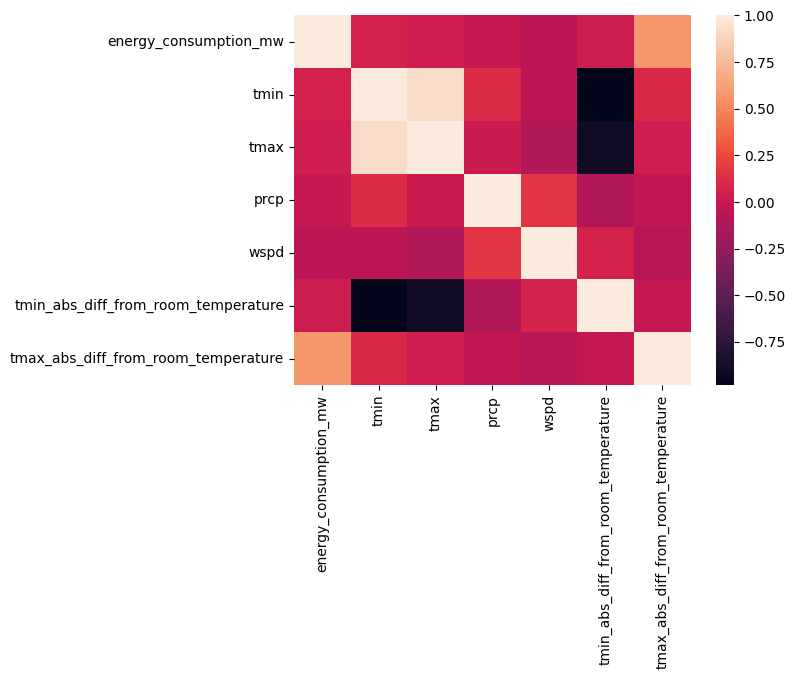

In [ ]:
sns.heatmap(correlation_matrix)

In [ ]:
remove_for_case_study = datetime(2020, 1, 1)
data_2006_to_2019 = data.loc[data['datetime'] <= remove_for_case_study].copy()

In [ ]:
case_study = data.loc[data['datetime'] >= remove_for_case_study].copy()

In [ ]:
data_2006_to_2019.head()

,energy_consumption_mw,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday,tavg,tmin,tmax,prcp,wspd,tmin_abs_diff_from_room_temperature,tmax_abs_diff_from_room_temperature
0,9250.0,2006-01-01,0,6,1,1,2006,1,1,52,...,False,False,False,5.8,-1.1,11.7,0.0,4.0,21.1,8.3
1,8978.0,2006-01-01,1,6,1,1,2006,1,1,52,...,False,False,False,5.8,-1.1,11.7,0.0,4.0,21.1,8.3
2,8773.0,2006-01-01,2,6,1,1,2006,1,1,52,...,False,False,False,5.8,-1.1,11.7,0.0,4.0,21.1,8.3
3,8671.0,2006-01-01,3,6,1,1,2006,1,1,52,...,False,False,False,5.8,-1.1,11.7,0.0,4.0,21.1,8.3
4,8664.0,2006-01-01,4,6,1,1,2006,1,1,52,...,False,False,False,5.8,-1.1,11.7,0.0,4.0,21.1,8.3


In [ ]:
data_2006_to_2019.tail()

,energy_consumption_mw,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday,tavg,tmin,tmax,prcp,wspd,tmin_abs_diff_from_room_temperature,tmax_abs_diff_from_room_temperature
122708,11442.870,2019-12-31,20,1,4,12,2019,365,31,1,...,False,False,False,10.9,5.0,13.9,0.0,11.9,15.0,6.1
122709,11166.770,2019-12-31,21,1,4,12,2019,365,31,1,...,False,False,False,10.9,5.0,13.9,0.0,11.9,15.0,6.1
122710,10838.550,2019-12-31,22,1,4,12,2019,365,31,1,...,False,False,False,10.9,5.0,13.9,0.0,11.9,15.0,6.1
122711,10592.674,2019-12-31,23,1,4,12,2019,365,31,1,...,False,False,False,10.9,5.0,13.9,0.0,11.9,15.0,6.1
122712,10364.707,2020-01-01,0,2,1,1,2020,1,1,1,...,False,False,False,7.1,1.7,12.2,0.0,13.7,18.3,7.8


In [ ]:
case_study.head()

,energy_consumption_mw,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday,tavg,tmin,tmax,prcp,wspd,tmin_abs_diff_from_room_temperature,tmax_abs_diff_from_room_temperature
122712,10364.707,2020-01-01,0,2,1,1,2020,1,1,1,...,False,False,False,7.1,1.7,12.2,0.0,13.7,18.3,7.8
122713,10291.858,2020-01-01,1,2,1,1,2020,1,1,1,...,False,False,False,7.1,1.7,12.2,0.0,13.7,18.3,7.8
122714,10252.082,2020-01-01,2,2,1,1,2020,1,1,1,...,False,False,False,7.1,1.7,12.2,0.0,13.7,18.3,7.8
122715,10303.804,2020-01-01,3,2,1,1,2020,1,1,1,...,False,False,False,7.1,1.7,12.2,0.0,13.7,18.3,7.8
122716,10588.920,2020-01-01,4,2,1,1,2020,1,1,1,...,False,False,False,7.1,1.7,12.2,0.0,13.7,18.3,7.8


In [ ]:
case_study.tail()

,energy_consumption_mw,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday,tavg,tmin,tmax,prcp,wspd,tmin_abs_diff_from_room_temperature,tmax_abs_diff_from_room_temperature
162882,20498.376,2024-07-31,19,2,3,7,2024,213,31,31,...,False,False,False,26.2,22.2,32.2,0.3,7.9,2.2,12.2
162883,19814.648,2024-07-31,20,2,3,7,2024,213,31,31,...,False,False,False,26.2,22.2,32.2,0.3,7.9,2.2,12.2
162884,18910.259,2024-07-31,21,2,3,7,2024,213,31,31,...,False,False,False,26.2,22.2,32.2,0.3,7.9,2.2,12.2
162885,17645.255,2024-07-31,22,2,3,7,2024,213,31,31,...,False,False,False,26.2,22.2,32.2,0.3,7.9,2.2,12.2
162886,16421.592,2024-07-31,23,2,3,7,2024,213,31,31,...,False,False,False,26.2,22.2,32.2,0.3,7.9,2.2,12.2


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = data_2006_to_2019.copy()


# 1. Missing Value Check
missing_values = data.isnull().sum()
print("Missing Value Check:")
print(missing_values)

Missing Value Check:
energy_consumption_mw                           0
date                                            0
hour                                            0
dayofweek                                       0
quarter                                         0
month                                           0
year                                            0
dayofyear                                       0
dayofmonth                                      0
weekofyear                                      0
datetime                                        0
holiday_                                        0
holiday_Christmas Day                           0
holiday_Columbus Day                            0
holiday_Independence Day                        0
holiday_Juneteenth National Independence Day    0
holiday_Labor Day                               0
holiday_Martin Luther King Jr. Day              0
holiday_Memorial Day                            0
holiday_New Year's Day       

In [ ]:
print(data.columns)

Index(['energy_consumption_mw', 'date', 'hour', 'dayofweek', 'quarter',
       'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'datetime',
       'holiday_', 'holiday_Christmas Day', 'holiday_Columbus Day',
       'holiday_Independence Day',
       'holiday_Juneteenth National Independence Day', 'holiday_Labor Day',
       'holiday_Martin Luther King Jr. Day', 'holiday_Memorial Day',
       'holiday_New Year's Day', 'holiday_Thanksgiving',
       'holiday_Veterans Day', 'holiday_Washington's Birthday', 'tavg', 'tmin',
       'tmax', 'prcp', 'wspd', 'tmin_abs_diff_from_room_temperature',
       'tmax_abs_diff_from_room_temperature'],
      dtype='object')


In [ ]:
# 2. Summary Statistics
summary_stats = data.describe()
print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
       energy_consumption_mw                           date           hour  \
count          122713.000000                         122713  122713.000000   
mean            11027.012419  2012-12-31 01:08:46.623910912      11.499792   
min              4724.204000            2006-01-01 00:00:00       0.000000   
25%              9395.000000            2009-07-02 00:00:00       5.000000   
50%             10588.491000            2012-12-31 00:00:00      11.000000   
75%             12456.172000            2016-07-01 00:00:00      17.000000   
max             21650.865000            2020-01-01 00:00:00      23.000000   
std              2411.213522                            NaN       6.922429   

           dayofweek        quarter          month           year  \
count  122713.000000  122713.000000  122713.000000  122713.000000   
mean        2.999601       2.509025       6.524223    2012.499768   
min         0.000000       1.000000       1.000000    2006.000000   


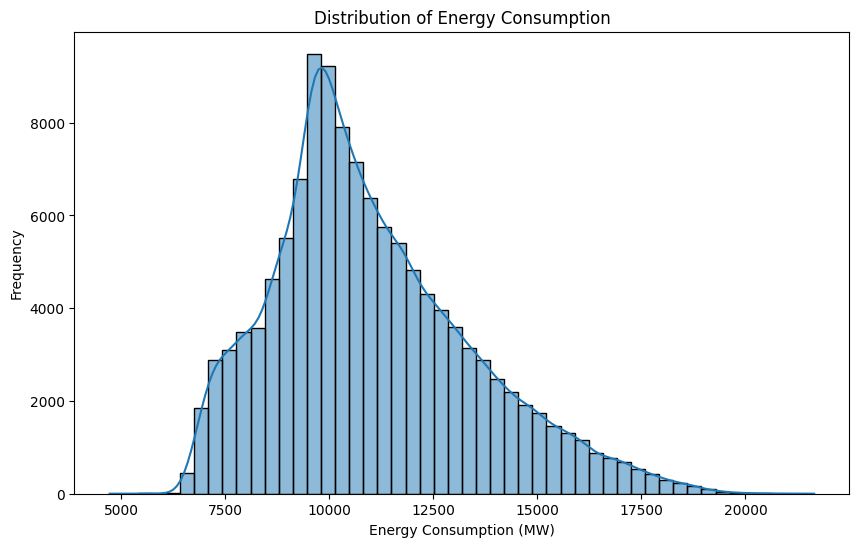

In [ ]:
# 4. Plot Distribution of Energy Consumption
plt.figure(figsize=(10, 6))
sns.histplot(data['energy_consumption_mw'], bins=50, kde=True)
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumption (MW)')
plt.ylabel('Frequency')
plt.show()

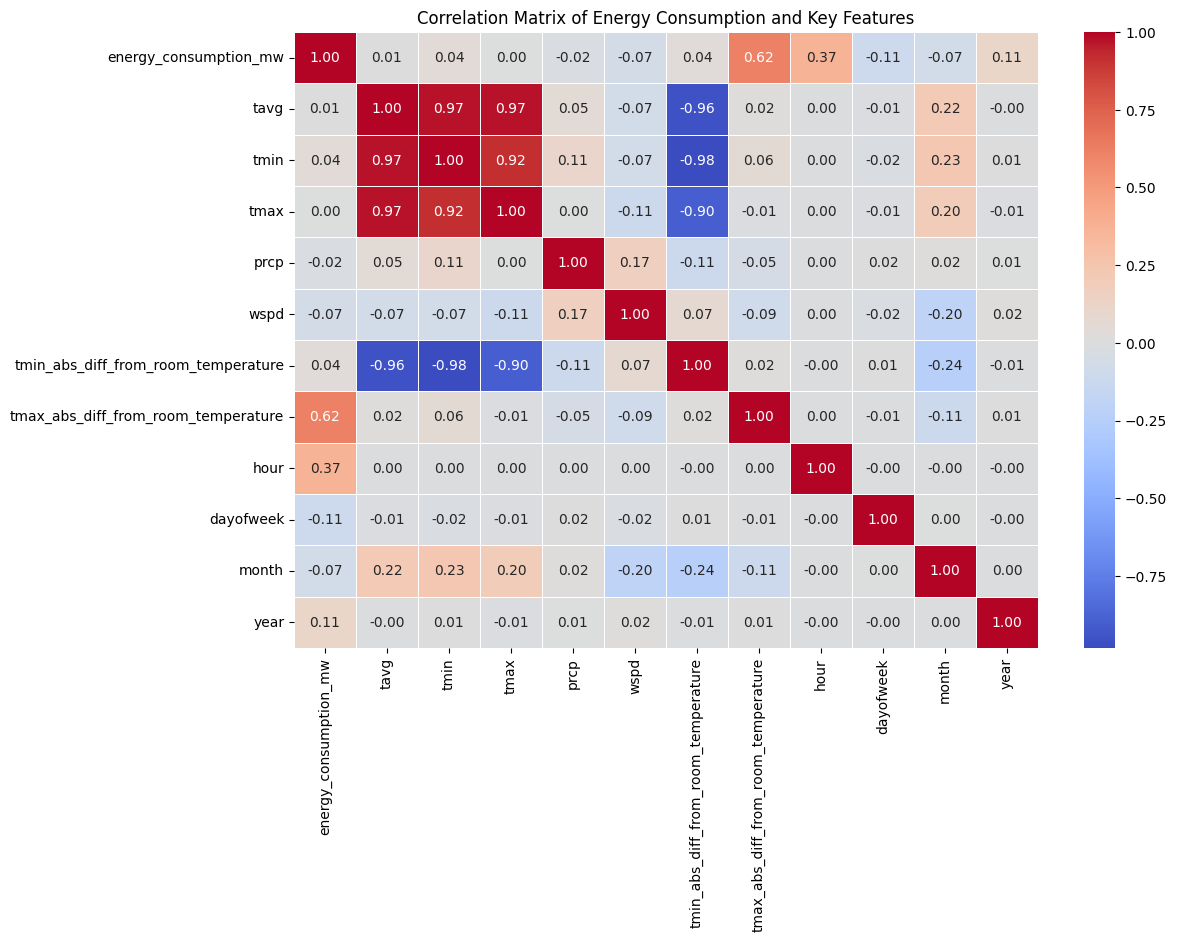

In [ ]:
# Let's calculate and display the correlation matrix between relevant numerical features and energy consumption.
# Focusing on weather and temporal features.

relevant_columns = ['energy_consumption_mw', 'tavg', 'tmin', 'tmax', 'prcp', 'wspd',
                    'tmin_abs_diff_from_room_temperature', 'tmax_abs_diff_from_room_temperature',
                    'hour', 'dayofweek', 'month', 'year']

# Calculate the correlation matrix
correlation_matrix = data[relevant_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Energy Consumption and Key Features')
plt.show()


In [ ]:
# Calculate the correlation matrix specifically between the selected columns and energy consumption
correlation_with_energy = data.corr()['energy_consumption_mw'].sort_values(ascending=False)

# Display the correlation values for each feature vs energy consumption
correlation_with_energy


,energy_consumption_mw
energy_consumption_mw,1.000000
tmax_abs_diff_from_room_temperature,0.620224
hour,0.370049
year,0.109964
datetime,0.104736
date,0.104664
tmin,0.040576
tmin_abs_diff_from_room_temperature,0.039211
holiday_Martin Luther King Jr. Day,0.035520
holiday_Washington's Birthday,0.029468



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



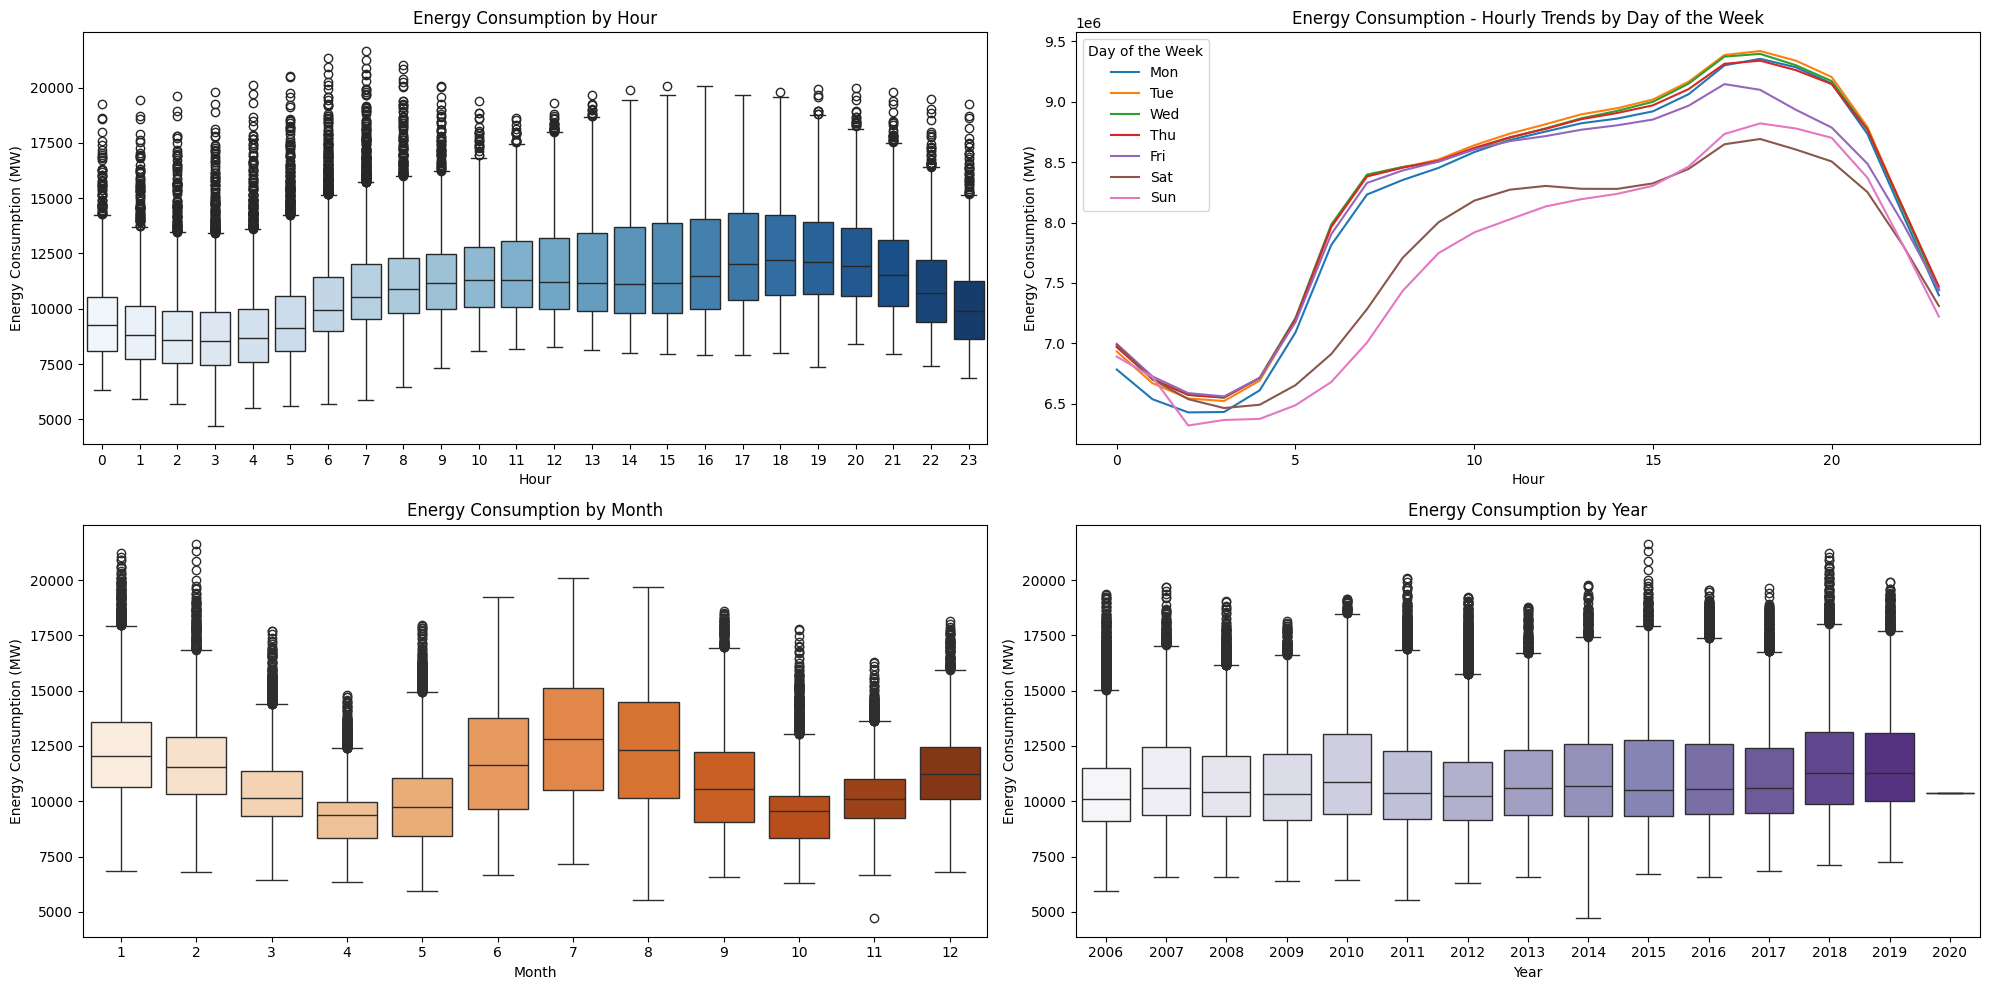

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots arranged in 2x2 layout
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# 1. Box plot for energy consumption by hour
sns.boxplot(x='hour', y='energy_consumption_mw', data=data, ax=axs[0, 0], palette='Blues')
axs[0, 0].set_title('Energy Consumption by Hour')
axs[0, 0].set_xlabel('Hour')
axs[0, 0].set_ylabel('Energy Consumption (MW)')

# 2. Line plot for energy consumption by hour and day of the week
df_pivot = data.pivot_table(index=data['hour'], columns='dayofweek', values='energy_consumption_mw', aggfunc='sum')
df_pivot.plot(ax=axs[0, 1], title='Energy Consumption - Hourly Trends by Day of the Week')

# Correct the x-axis labels for day of the week (0 = Monday, 6 = Sunday)
axs[0, 1].set_xlabel('Hour')
axs[0, 1].set_ylabel('Energy Consumption (MW)')
axs[0, 1].legend(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], title="Day of the Week")

# 3. Box plot for energy consumption by month
sns.boxplot(x='month', y='energy_consumption_mw', data=data, palette='Oranges', ax=axs[1, 0])
axs[1, 0].set_title('Energy Consumption by Month')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Energy Consumption (MW)')

# 4. Box plot for energy consumption by year
sns.boxplot(x='year', y='energy_consumption_mw', data=data, palette='Purples', ax=axs[1, 1])
axs[1, 1].set_title('Energy Consumption by Year')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Energy Consumption (MW)')

# Adjust the layout to make the plots look clean and readable
plt.tight_layout()
plt.show()


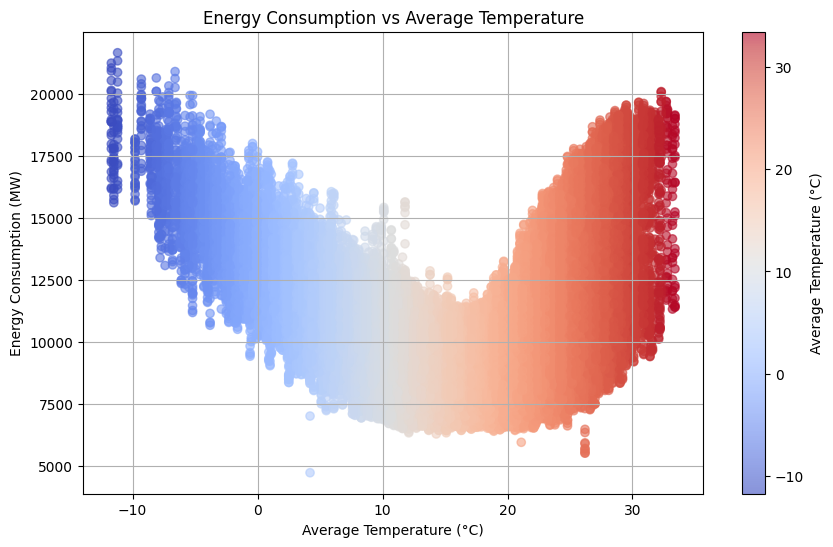

In [ ]:
import matplotlib.pyplot as plt

# Plot energy consumption vs temperature (average temperature 'tavg')
plt.figure(figsize=(10, 6))

# Scatter plot with color mapping based on temperature (tavg)
plt.scatter(data['tavg'], data['energy_consumption_mw'], alpha=0.6, c=data['tavg'], cmap='coolwarm')

# Add a color bar to show the mapping of colors to temperatures
plt.colorbar(label='Average Temperature (°C)')

# Adding title and labels
plt.title('Energy Consumption vs Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Energy Consumption (MW)')
plt.grid(True)

# Show the plot
plt.show()


## Export files

In [ ]:
# Export the combined dataframe to a new CSV file
output_file_path = 'case_study_timeseries_PJM_DOM_consumption_2020_to_2024.csv'
case_study.to_csv(output_file_path, index=False)

output_file_path

'case_study_timeseries_PJM_DOM_consumption_2020_to_2024.csv'

In [ ]:
# Export the combined dataframe to a new CSV file
output_file_path = 'data_timeseries_PJM_DOM_consumption_2006_to_2019.csv'
data_2006_to_2019.to_csv(output_file_path, index=False)

output_file_path

'data_timeseries_PJM_DOM_consumption_2006_to_2019.csv'

In [ ]:
# Export the combined dataframe to a new CSV file
output_file_path = 'datetime_features_timeseries_PJM_DOM_consumption_2006_to_2024.csv'
data_dt.to_csv(output_file_path, index=False)

output_file_path

'datetime_features_timeseries_PJM_DOM_consumption_2006_to_2024.csv'